In [161]:
#Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [121]:
#Import data downloaded from Kaggle
data_1 = pd.read_csv(r"C:\Users\Miles Strother\Desktop\Kaggle\PFS\sales_train.csv.gz")
data_1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


#Because the test set does not include sale date, the date_block_num should account for seasonal trends.  Otherwise, I would
#create new variables that could be used for any year with the following two cells.
dates = data_1['date']
year = []
day = []
for x in dates:
    years = int(x[-4:])
    month = int(x[3:5])
    days = int(x[:2])
    year.append(years)
    days_in_the_year = (dt.date(years, month, days) - dt.date(years,1,1)).days + 1
    day.append(days_in_the_year)

years = pd.Series(year)
days = pd.Series(day)
data_1['year'] = years.values
data_1['day'] = days.values
data_1.head()

In [157]:
#Check for and replace any erroneous prices
minimum = min(data_1['item_price'])
print(minimum)
count = data_1['item_price'].eq(-1.0).sum()
print(count)

-1.0
1


In [156]:
#Drop and re-check
data_2 = data_1[(data_1 != -1).all(1)]
minimum = min(data_2['item_price'])
print(minimum)

0.07


In [159]:
#Check max values of price and number sold for box plots
max_p = max(data_2['item_price'])
print(max_p)
max_q = max(data_2['item_cnt_day'])
print(max_q)

307980.0
2169.0


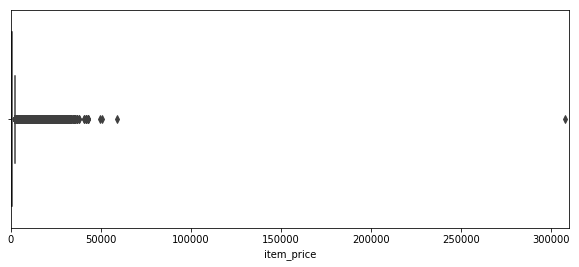

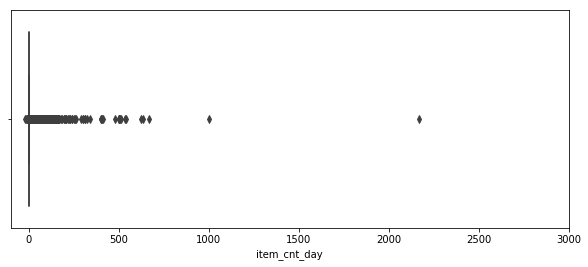

In [163]:
#View distribution and outliers for price and number sold
plt.figure(figsize=(10,4))
plt.xlim(0, 310000)
sns.boxplot(x=data_2['item_price'])

plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=data_2['item_cnt_day'])

In [164]:
#Having an item price of over $300,000 seems odd, so I'm going to see what it is to assume whether or not it's an error
data_2.loc[data_2['item_price'] == 307980.0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,new_price
1163158,13.12.2013,11,12,6066,307980.0,1.0,307980.0


In [168]:
items = pd.read_csv(r"C:\Users\Miles Strother\Desktop\Kaggle\PFS\items.csv")
items.loc[items['item_id'] == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [169]:
item_categories = pd.read_csv(r"C:\Users\Miles Strother\Desktop\Kaggle\PFS\item_categories.csv")
item_categories.loc[items['item_category_id'] == 75]

,item_category_name,item_category_id


In [ ]:
#Because it still seems like there are some huge outliers, I'm going to eliminate them and compare their effects later in modeling


In [142]:
test = pd.read_csv(r"C:\Users\Miles Strother\Desktop\Kaggle\PFS\test.csv.gz")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [134]:
count = data_1['item_cnt_day'].eq(6.0).sum()
mean = st.mean(data_1['item_cnt_day'])
print(mean)
print(count)

1.242640885140891
6338
